In [1]:
#Massenspektrometer juypter notebook

import numpy as np 
from uncertainties import ufloat, unumpy
from scipy.signal import savgol_filter
import pandas as pd
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler   
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def FWHM(X,Y,frac=2):
    d = Y - (max(Y) / frac) 
    indexes = np.where(d > 0)[0] 
    return abs(X[indexes[-1]] - X[indexes[0]])

def linearFit(x,a,b):
    return a*x +b

[43.728 44.12  43.728 44.12  44.12  44.12  44.512 44.512  1.392  1.392
  1.784  1.784  1.784  1.784  1.784  2.176  2.568  2.568  2.96   7.272
 16.288 16.288 16.68  16.68  17.072 17.072 17.464 17.464 17.464 17.464
 17.856 17.856 17.464 18.248 18.248 18.248 18.248 18.248 18.64  18.64
 18.64  18.64  19.032 19.032 19.032 19.032 19.424 19.424 19.424 19.424
 19.816 27.656 28.048 28.048 28.048 28.048 28.048 28.44  28.832 28.44
 31.576 31.968 31.968 31.968 32.36  32.36  43.728 43.728 43.728 44.12
 44.12  44.12  44.12   1.392  1.392  1.784  1.784  2.176  2.176  2.568
  2.568]


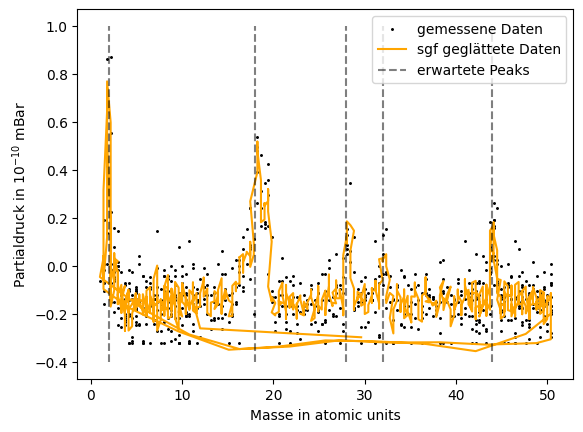

In [2]:

#spektrum von masse 1-51
_,mass=np.loadtxt('Daten/20191024_880015.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_880307.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[108:623]*5 +1)
mass=mass*(5-0.1)+1
amplitude=amplitude
plt.scatter(mass,amplitude,marker=".",color="black",s=5,label="gemessene Daten")
amplitude = savgol_filter(amplitude,10,5)
plt.plot(mass,amplitude,color="orange",label="sgf geglättete Daten")
print(mass[np.where(amplitude>0.0)])
plt.vlines([2,18,28,32,44],ymin=-0.4,ymax=1,alpha=0.5,color="black",linestyle="--",label="erwartete Peaks")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-10}$ mBar")
#Wasserstoff, Wasser, N2, Sauerstoff, Kohlendioxid
plt.savefig("include/MSBreitspektrum.png")
plt.show()


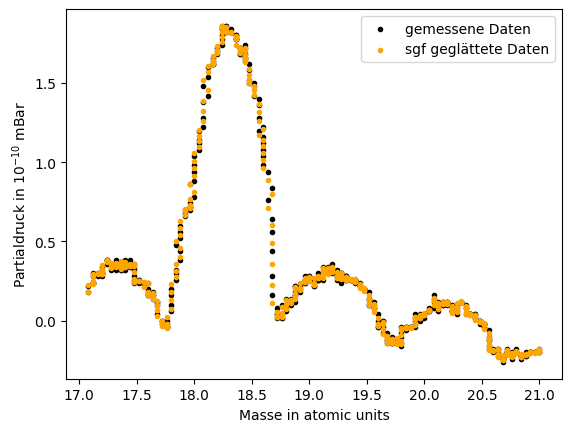

0.6000000000000014 [18.24] [30.4]


In [3]:
#peak um 18
_,mass=np.loadtxt('Daten/20191024_881355.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_881433.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[136:660])
mass=(mass[250:660]-0.08)*(2.1-1.6)+16
amplitude=amplitude[250:660]
plt.scatter(mass,amplitude,marker=".",color="black",label="gemessene Daten")
amplitude = savgol_filter(amplitude,10,5)
plt.scatter(mass,amplitude,color="orange",marker=".",label="sgf geglättete Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-10}$ mBar")
plt.savefig("include/MSm18Wasser.png")
plt.show()
fwhm=(FWHM(mass[:],amplitude[:]))
m = mass[np.where(amplitude[:]==max(amplitude[:]))]
r = m/fwhm
print(fwhm,m,r)


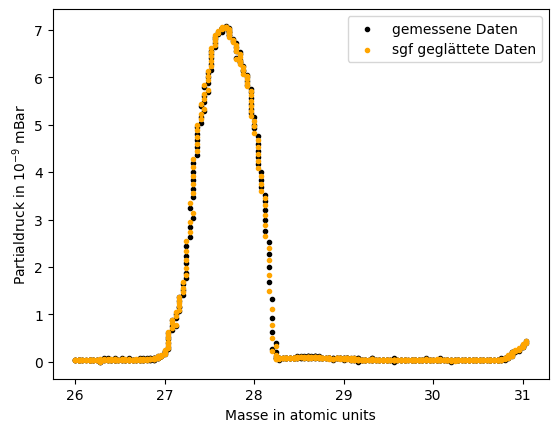

0.759999999999998 [27.68] [36.42105263]


In [4]:

#peak um 28
_,mass=np.loadtxt('Daten/20191024_883029.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_883056.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[102:629])
mass=(mass[102:629]-0.08)*(3.1-2.6)+26
amplitude=amplitude[102:629]
plt.scatter(mass,amplitude,marker=".",color="black",label="gemessene Daten")
amplitude = savgol_filter(amplitude,10,5)
plt.scatter(mass,amplitude,color="orange",marker=".",label="sgf geglättete Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-9}$ mBar")
plt.savefig("include/MSm28N2.png")
plt.show()
fwhm=(FWHM(mass,amplitude))
m = mass[np.where(amplitude==max(amplitude))]
r = m/fwhm
print(fwhm,m,r)

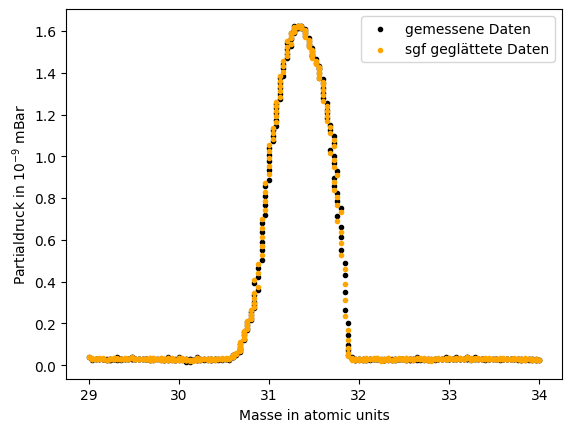

0.759999999999998 [31.36] [41.26315789]


In [5]:
#peak um 32
_,mass=np.loadtxt('Daten/20191024_882708.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_882747.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[164:684])
mass=(mass[164:684]-0.08)*(3.4-2.9)+29
amplitude=amplitude[164:684]
plt.scatter(mass,amplitude,marker=".",color="black",label="gemessene Daten")
amplitude = savgol_filter(amplitude,10,5)
plt.scatter(mass,amplitude,color="orange",marker=".",label="sgf geglättete Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-9}$ mBar")
plt.savefig("include/MSm32O2.png")
plt.show()
fwhm=(FWHM(mass,amplitude))
m = mass[np.where(amplitude==max(amplitude))]
r = m/fwhm
print(fwhm,m,r)

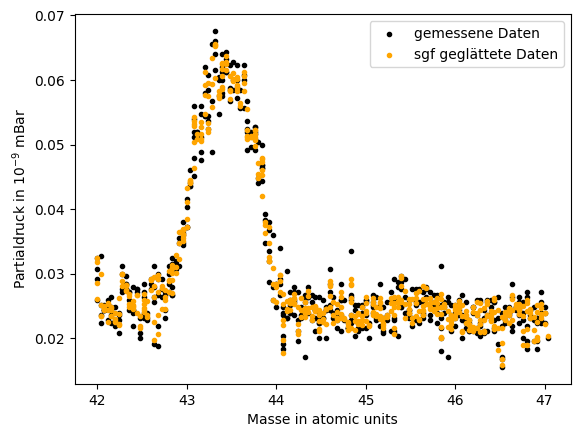

1.0399999999999991 [43.32] [41.65384615]


In [6]:
#peak um 44
_,mass=np.loadtxt('Daten/20191024_883422.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_883444.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[195:722])
mass=(mass[195:722]-0.08)*(4.7-4.2)+42
amplitude=amplitude[195:722]
plt.scatter(mass,amplitude,marker=".",color="black",label="gemessene Daten")
amplitude = savgol_filter(amplitude,10,5)
plt.scatter(mass,amplitude,color="orange",marker=".",label="sgf geglättete Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-9}$ mBar")
plt.savefig("include/MSm44CO2.png")
plt.show()
fwhm=(FWHM(mass,amplitude))
m = mass[np.where(amplitude==max(amplitude))]
r = m/fwhm
print(fwhm,m,r)

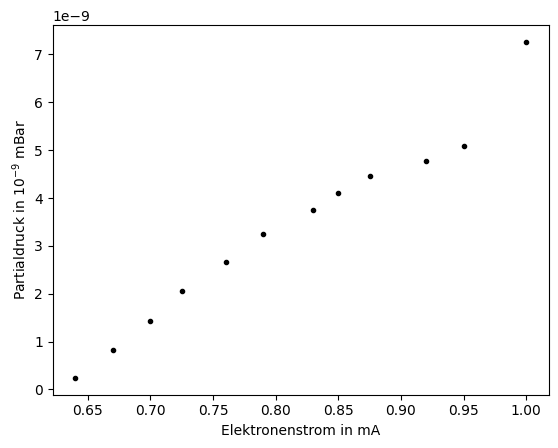

In [7]:
#partialdruck zu elektronenstrom zusammenhang
I = [1,       0.95,    0.92,    0.875,   0.85,    0.83,    0.79,    0.76,    0.725,   0.7,   0.67,    0.64]
p = [7.26e-9, 5.08e-9, 4.77e-9, 4.46e-9, 4.11e-9, 3.74e-9, 3.24e-9, 2.66e-9, 2.05e-9,1.43e-9, 0.82e-9, 0.24e-9]
plt.scatter(I,p,color="black",marker = ".")

plt.xlabel("Elektronenstrom in mA")
plt.ylabel("Partialdruck in $10^{-9}$ mBar")
plt.savefig("include/MSpardEI.png")
plt.show()

2.093898619032776 -109.42241415588296 [ 0.00046344 -0.02448862] [-0.02448862  1.29410416]


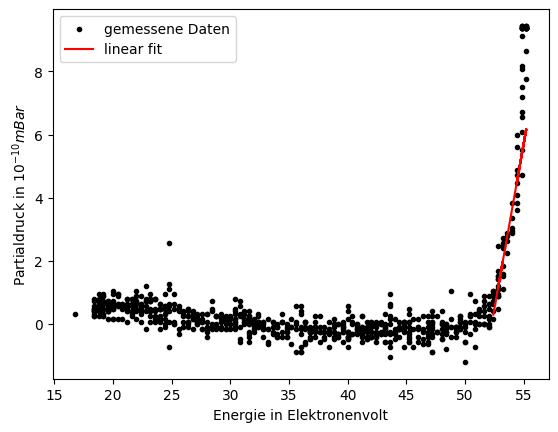

m=  2.0938986190327761e-10 +- 2.1527639965901823e-12
c=  -1.0942241415588297e-08 +- 1.1375869905837652e-10
E_aus = -c/m
52.2577421663461 +- 28.390931157425563


In [8]:
#Aufgabe 2: Austrittsenergie Argon

#peak 40:
_,energy=np.loadtxt('Daten/20191024_895849.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_895934.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


energy=abs(energy)
amplitude=amplitude

plt.scatter(energy,amplitude,marker=".",color="black",label="gemessene Daten")
#amplitude = savgol_filter(amplitude,10,5)
#plt.scatter(energy,amplitude,color="orange",marker=".",label="sgf geglättete Daten")


#linear ab 680
start = 680
end= 750

popt,pcov = curve_fit(linearFit, energy[start:end], amplitude[start:end],sigma = amplitude[start:end]*0.05, absolute_sigma = True)
plt.plot(energy[start:end],linearFit(energy[start:end],*popt),color="red", label="linear fit")
print(*popt, *pcov)

plt.legend()
plt.xlabel("Energie in Elektronenvolt")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
plt.show()
sigma_m = np.sqrt(pcov[0,0])*10**-10
sigma_c = np.sqrt(pcov[1,1])*10**-10
m  =popt[0]*10**-10
c = popt[1]*10**-10
print("m= ",m,"+-",sigma_m)
print("c= ",c,"+-",sigma_c)
print("E_aus = -c/m")
E_aus = -c/m
E_aus_sig = np.sqrt((-sigma_m/m)**2+(c*sigma_c/(m**2))**2)
print(E_aus,"+-",E_aus_sig)

In [9]:
#peak 20: 
_,energy=np.loadtxt('Daten/20191024_900339.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_900403.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[195:722])
energy=abs(energy)
amplitude=amplitude
plt.scatter(energy,amplitude,marker=".",color="black")
amplitude = savgol_filter(amplitude,10,5)
plt.scatter(energy,amplitude,color="orange",marker=".")
plt.legend()
plt.xlabel("Energie in Elektronenvolt")
plt.ylabel("Partialdruck in $10^{-9} mBar$")
plt.show()

FileNotFoundError: Daten/20191024_900403.bin.dat not found.

In [ ]:
#Aufgabe 3:Dissenergie von Stickstoff
#peak 28
_,energy=np.loadtxt('Daten/20191024_892330.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_892521.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[195:722])
energy=abs(energy)
amplitude=amplitude
plt.scatter(energy,amplitude,marker=".",color="black",label="gemessene Daten")
#amplitude = savgol_filter(amplitude,10,5)
#plt.scatter(energy,amplitude,color="orange",marker=".")

start = 420
end= 485

popt,pcov = curve_fit(linearFit, energy[start:end], amplitude[start:end],sigma = amplitude[start:end]*0.05, absolute_sigma = True)
plt.plot(energy[start:end],linearFit(energy[start:end],*popt),color="red", label="linear fit")
print(*popt, *pcov)

plt.legend()
plt.xlabel("Energie in Elektronenvolt")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
plt.show()
sigma_m = np.sqrt(pcov[0,0])*10**-10
sigma_c = np.sqrt(pcov[1,1])*10**-10
m  =popt[0]*10**-10
c = popt[1]*10**-10
print("m= ",m,"+-",sigma_m)
print("c= ",c,"+-",sigma_c)
print("E_aus = -c/m")
E_Np = -c/m
E_Np_sig = np.sqrt((-sigma_m/m)**2+(c*sigma_c/(m**2))**2)
print(E_Np,"+-",E_Np_sig)


In [ ]:
#peak 14

_,energy=np.loadtxt('Daten/20191024_892922.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_892946.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[195:722])
energy=abs(energy)
amplitude=amplitude
plt.scatter(energy,amplitude,marker=".",color="black",label="gemessene Daten")
#amplitude = savgol_filter(amplitude,10,5)
#plt.scatter(energy,amplitude,color="orange",marker=".")


start = 360
end= 570

popt,pcov = curve_fit(linearFit, energy[start:end], amplitude[start:end],sigma = amplitude[start:end]*0.05, absolute_sigma = True)
plt.plot(energy[start:end],linearFit(energy[start:end],*popt),color="red", label="linear fit")
print(*popt, *pcov)

plt.legend()
plt.xlabel("Energie in Elektronenvolt")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
plt.show()
sigma_m = np.sqrt(pcov[0,0])*10**-10
sigma_c = np.sqrt(pcov[1,1])*10**-10
m  =popt[0]*10**-10
c = popt[1]*10**-10
print("m= ",m,"+-",sigma_m)
print("c= ",c,"+-",sigma_c)
print("E_aus = -c/m")
E_N2p = -c/m
E_N2p_sig = np.sqrt((-sigma_m/m)**2+(c*sigma_c/(m**2))**2)
print(E_N2p,"+-",E_N2p_sig)

In [ ]:
E_D_N2p = E_Np - E_N2p
E_D_N2p_sig = np.sqrt(E_N2p_sig**2 + E_Np_sig**2)
print(E_D_N2p,"+-",E_D_N2p_sig)
E_D_Np = E_Np - 14.5
E_D_Np_sig =  np.sqrt(E_Np_sig**2)
print(E_D_Np,"+-",E_D_Np_sig)

In [ ]:
#Aufgabe 4:Quantitative Analyse



_,mass=np.loadtxt('Daten/20191024_893902.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_894014.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

start=0
end=279
mass=(mass[start:end]-0.08)*(2.1-0.1)+1
amplitude=amplitude[start:end]
#plt.scatter(mass,amplitude,marker=".",color="black")
#amplitude = savgol_filter(amplitude,10,5)
#plt.scatter(mass,amplitude,color="orange",marker=".")
#plt.show()


_,mass2=np.loadtxt('Daten/20191024_894307.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude2=np.loadtxt('Daten/20191024_894339.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


mass2=(mass2-0.04)*(4.2-2.2)+22
amplitude2=amplitude2
#plt.scatter(mass2,amplitude2,marker=".",color="black")
#amplitude = savgol_filter(amplitude,10,5)
#plt.scatter(mass2,amplitude2,color="orange",marker=".")
#plt.show()
mass = np.append(mass,mass2)
amplitude = np.append(amplitude,amplitude2)
mass =mass[np.where(amplitude>0.0)]
amplitude =amplitude[np.where(amplitude>0.0)]
plt.scatter(mass,amplitude,marker=".",s=5,color="black",label="gemessene Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
plt.show()
#print(mass,amplitude)
#print(max(amplitude[np.where(np.logical_and(mass>42, mass<=45))]))
m = [2,14,16,18,28,32,36,40,44]
weight= np.array([0.7,1,0.62,1.17,1,0.62,1.16,0.9])
ParDruck = [0.24,5.76,4.72,1.52,3.2,0.4,0.48,0]

korrParDruck = ParDruck/weight
print(korrParDruck)
print(np.sum(korrParDruck))
perc = ParDruck/np.sum(korrParDruck)
print(perc)

In [ ]:

#spektrum von masse 1-51
_,mass=np.loadtxt('Daten/20191024_901657.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten
_,amplitude=np.loadtxt('Daten/20191024_901723.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten



#print(mass[108:623]*5 +1)
mass=mass*(5.1-0.1)+1
amplitude=amplitude
mass =mass[np.where(amplitude>0.0)]

amplitude =amplitude[np.where(amplitude>0.0)]
plt.scatter(mass,amplitude,marker=".",color="black",s=5,label="gemessene Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-8} mBar$")

plt.show()

In [ ]:
_,mass=np.loadtxt('Daten/20191024_902841.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_902908.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[108:623]*5 +1)
mass=mass*(5.1-0.1)+1
amplitude=amplitude
mass =mass[np.where(amplitude>-0.5)]
amplitude =amplitude[np.where(amplitude>-0.5)]
plt.scatter(mass,amplitude,marker=".",color="black",s=5,label="gemessene Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
#Wasserstoff, Wasser, N2, Sauerstoff, Kohlendioxid
plt.show()

In [ ]:
_,mass=np.loadtxt('Daten/20191024_903049.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten


_,amplitude=np.loadtxt('Daten/20191024_903114.bin.dat',skiprows=3,unpack=True,delimiter = ";") #importiere Daten

#print(mass[108:623]*5 +1)
mass=mass*(5.1-0.1)+1
amplitude=amplitude
mass =mass[np.where(amplitude>-0.5)]
amplitude =amplitude[np.where(amplitude>-0.5)]
plt.scatter(mass,amplitude,marker=".",color="black",s=5,label="gemessene Daten")
plt.legend()
plt.xlabel("Masse in atomic units")
plt.ylabel("Partialdruck in $10^{-10} mBar$")
#Wasserstoff, Wasser, N2, Sauerstoff, Kohlendioxid
plt.show()